In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_line, geom_bar, facet_wrap



In [133]:
orders = pd.read_csv('./data/Orders.csv')
returns = pd.read_csv('./data/Returns.csv')


In [134]:
## Replace $ and , in profit column and convert to numeric

orders['Profit'] = orders['Profit'].str.replace("$","")
orders['Profit'] = orders['Profit'].str.replace(",","")
orders['Profit'] = pd.to_numeric(orders['Profit'])

## Replace $ and , in sales column and convert to numeric
orders['Sales'] = orders['Sales'].str.replace("$","")
orders['Sales'] = orders['Sales'].str.replace(",","")
orders['Sales'] = pd.to_numeric(orders['Sales'])

<ipython-input-134-a4730ee54ae3>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
<ipython-input-134-a4730ee54ae3>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


In [135]:
## Extract the month from each order.date

orders['Month'] = pd.DatetimeIndex(orders['Order.Date']).month

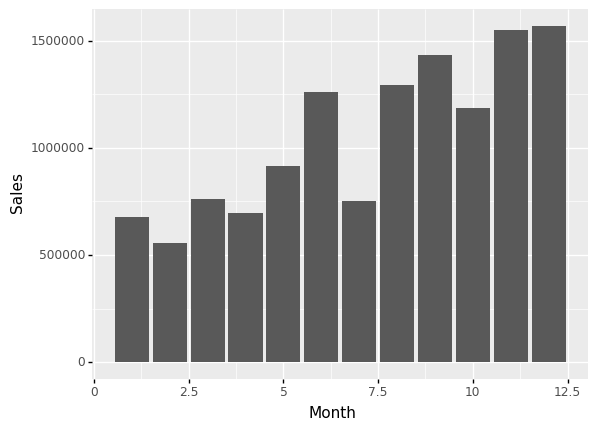

<ggplot: (113047765881)>

In [136]:
ggplot(orders) + aes(x = 'Month', y ='Sales') + geom_bar(stat=  'identity')

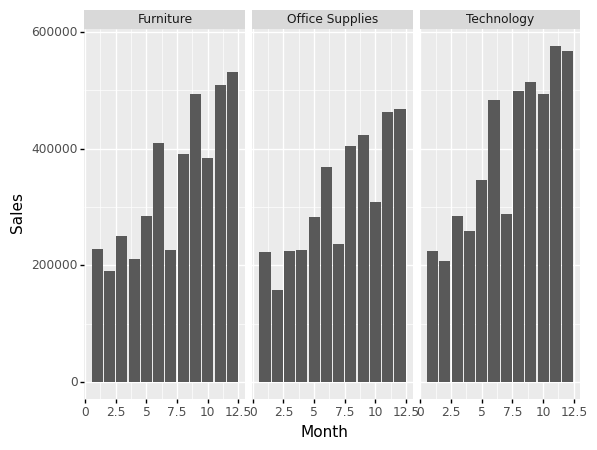

<ggplot: (113041164276)>

In [137]:
ggplot(orders) + aes(x = 'Month', y ='Sales') + geom_bar(stat=  'identity') + facet_wrap('Category')

In [ ]:
## Feature Engineering 
# --------------------------------------------------------

In [140]:
returns

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania
...,...,...,...
1074,Yes,IN-2014-DA1345058-41769,Southern Asia
1075,Yes,US-2013-HG14845140-41530,Eastern US
1076,Yes,US-2013-SJ2021582-41543,Central America
1077,Yes,CA-2015-EB13870140-42269,Eastern US


In [148]:
## Orders with returns, merge the two dataframes (4.1)
orders_with_returns = pd.merge(orders, returns, left_on = "Order.ID" , right_on='Order ID',  how = "outer")
orders_with_returns['Returned'].fillna(value = 'No', inplace = True)
orders_with_returns.drop(columns= ['Order ID', 'Region_y'] , inplace=True, axis =1)

In [154]:
## Create process time after converting order and ship dates to date objects (4.2)
orders_with_returns['Order.Date'] = pd.to_datetime(orders_with_returns['Order.Date'])
orders_with_returns['Ship.Date'] = pd.to_datetime(orders_with_returns['Ship.Date'])
orders_with_returns['Process.Time'] = orders_with_returns['Ship.Date'] - orders_with_returns['Order.Date']

In [189]:
orders_with_returns['Returned'] = orders_with_returns['Returned'].str.replace("No","0")
orders_with_returns['Returned'] = orders_with_returns['Returned'].str.replace("Yes","1")
orders_with_returns['Returned'] = pd.to_numeric(orders_with_returns['Returned'])

product_returns = orders_with_returns.groupby('Product.ID')['Returned'].sum()